In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 鸢尾花鸟数据集导入
iris = load_iris()

# X：鸢尾花鸟特征 Y：鸢尾花鸟标签
X=iris.data
y=iris.target

y_sh = []
for i in y:
    if i==0:
        y_sh.append([1,0,0])
    if i==1:
        y_sh.append([0,1,0])
    if i==2:
        y_sh.append([0,0,1])
y_sh = np.array(y_sh)
X_train,X_test,y_train,y_test=train_test_split(X,y_sh,test_size=0.3,random_state=0)

# 数据标准化
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(4, )))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(X_train_std, y_train, epochs=30)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
105/105 [==============================] - 0s 3ms/step - loss: 1.0458 - acc: 0.3238
Epoch 2/30
105/105 [==============================] - 0s 76us/step - loss: 1.0198 - acc: 0.3333
Epoch 3/30
105/105 [==============================] - 0s 86us/step - loss: 0.9942 - acc: 0.3333
Epoch 4/30
105/105 [==============================] - 0s 67us/step - loss: 0.9716 - acc: 0.3333
Epoch 5/30
105/105 [=====

In [3]:
# 提取出准确率
loss, acc = model.evaluate(X_test_std, y_test)
y_pred = model.predict(X_test_std)

45/45 [==============================] - 0s 646us/step


In [4]:
# 输出准确率
acc

0.6222222261958652

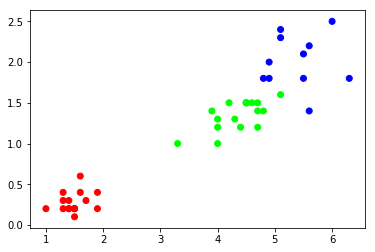

In [12]:
# 画出原始分类情况
plt.scatter(X_test[:,2], X_test[:,3], c=y_test)

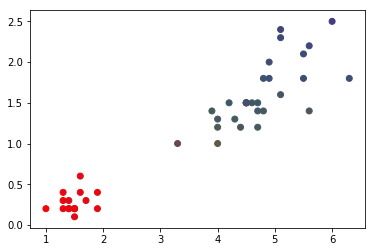

In [9]:
# 画出预测结果的分类情况
plt.scatter(X_test[:,2], X_test[:,3], c=y_pred)